# k-NN Regression (KNeighborsRegressor) sobre Iris
Predecir `petal_length` a partir de las otras tres características.
Reservamos un 10% para validación y usamos R² como métrica principal.

Dimensiones del dataset Iris: (150, 5)
   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

Tamaños: X_train=(135, 3), X_val=(15, 3)

Resultados (n_neighbors=5):
R² (train): 0.9746
R² (validación 10%): 0.9710
MSE (validación): 0.0899
MAE (validación): 0.2480


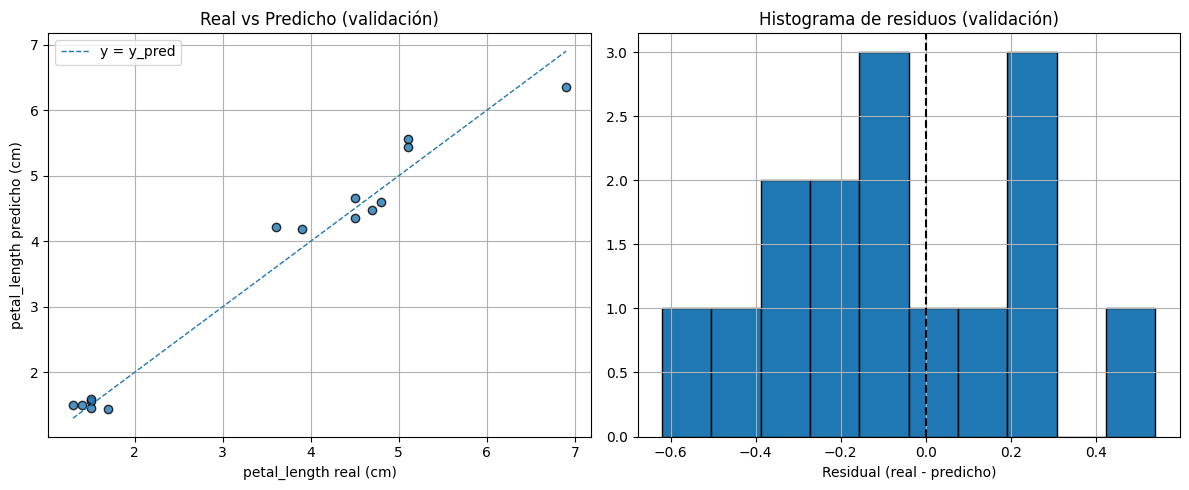


Comparativa rápida de k (validación 10%):
 k   R2_val  MSE_val
 1 0.949412 0.156667
 3 0.962758 0.115333
 5 0.970982 0.089867
 7 0.963466 0.113143
 9 0.961222 0.120091
11 0.956252 0.135482
15 0.953825 0.142999


In [1]:

# ===============================================
# k-NN Regression (KNeighborsRegressor) sobre Iris
# ===============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

%matplotlib inline

# ---------------------------
# Cargar dataset Iris
# ---------------------------
iris = load_iris(as_frame=True)
df = iris.frame.copy()
df.columns = [c.replace(' (cm)', '').replace(' ', '_') for c in df.columns]
df = df.rename(columns={
    'sepal_length': 'sepal_length',
    'sepal_width':  'sepal_width',
    'petal_length': 'petal_length',
    'petal_width':  'petal_width'
})

print("Dimensiones del dataset Iris:", df.shape)
print(df.head())

# ----------------------------------------
# Preparar features y target
# ----------------------------------------
features = ['sepal_length', 'sepal_width', 'petal_width']
target = 'petal_length'

X = df[features].values
y = df[target].values

# --------------------------
# Split 90% train / 10% test
# --------------------------
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42)
print(f"\nTamaños: X_train={X_train.shape}, X_val={X_val.shape}")

# --------------------------
# Pipeline: StandardScaler + KNN
# --------------------------
n_neighbors = 5
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=n_neighbors, weights='uniform'))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_val_pred   = pipe.predict(X_val)

# --------------------------
# Métricas
# --------------------------
r2_train = r2_score(y_train, y_train_pred)
r2_val   = r2_score(y_val, y_val_pred)
mse_val  = mean_squared_error(y_val, y_val_pred)
mae_val  = mean_absolute_error(y_val, y_val_pred)

print(f"\nResultados (n_neighbors={n_neighbors}):")
print(f"R² (train): {r2_train:.4f}")
print(f"R² (validación 10%): {r2_val:.4f}")
print(f"MSE (validación): {mse_val:.4f}")
print(f"MAE (validación): {mae_val:.4f}")

# --------------------------
# Gráficas
# --------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(y_val, y_val_pred, edgecolors='k', alpha=0.8)
min_v = min(y_val.min(), y_val_pred.min())
max_v = max(y_val.max(), y_val_pred.max())
axes[0].plot([min_v, max_v], [min_v, max_v], ls='--', lw=1, label='y = y_pred')
axes[0].set_xlabel('petal_length real (cm)')
axes[0].set_ylabel('petal_length predicho (cm)')
axes[0].set_title('Real vs Predicho (validación)')
axes[0].legend()
axes[0].grid(True)

residuals = y_val - y_val_pred
axes[1].hist(residuals, bins=10, edgecolor='k')
axes[1].axvline(0, color='k', linestyle='--')
axes[1].set_xlabel('Residual (real - predicho)')
axes[1].set_title('Histograma de residuos (validación)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# --------------------------
# Comparativa de diferentes k
# --------------------------
ks = [1, 3, 5, 7, 9, 11, 15]
results = []
for k in ks:
    p = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_neighbors=k))])
    p.fit(X_train, y_train)
    yv = p.predict(X_val)
    results.append((k, r2_score(y_val, yv), mean_squared_error(y_val, yv)))

res_df = pd.DataFrame(results, columns=['k', 'R2_val', 'MSE_val']).sort_values('k')
print("\nComparativa rápida de k (validación 10%):")
print(res_df.to_string(index=False))
